# Data Science Methodology Demonstration 

### Title: *An efficient data-driven predictive modeling and evaluation  for a class of data*
###  Author:* Alan Ganesh*

## Main Objective:

### In this demonstration my main goal is to present myself as a client (say, hospital) and as a data scientist to understand a problem for the client and apply my data science methodology (DSM) knowledge at several stages (given in the following flow-chart), to provide an iterative DSM model solutions for the client, in conjunction with the client data concerning a list of diagnoses observed in the hospital. Related *business understanding* between the client and DSM forms the first step of the flow-chart:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%201/images/lab1_fig1_flowchart_business_understanding.png" width=500>

## Step-1:  *Business Understanding* 

###  Understanding the client's proposal by the data-scientist (DS), and also that by the client (through requirements from the DS on the proposal) is a  fundamental first step for application of the DSM. To this end, for this demonstration, we first describe key parts of the first step.

### The client proposed the following: Several types of diagnostic measurements (such as levels of cholesterol, blood pressure/sugar, heart rate etc.) have been taken in the client's hospital for a few hundred patients, and for each of these patients doctors' diagnosis of whether the patient is categorized as the one with or without heart disease are also available. These details were recorded in an Excel spreadsheet and can be given to the DS. 

### Based on the proposal, the DS then asked for the following clarification: Is it possible for  the client to define the key  problem to be addressed based on the spreadsheet. Seeking this clarification resulted in the client defining the problem: Main interest is to see if many of the standard diagnoses (such as listed above) can be efficiently used to model a better understanding of a crucial diagnosis (say, Chest Pain level) that quickly helps the doctor to categorize whether the patient is suffering from heart disease. In practice it will be helpful to avoid waiting for the crucial diagnosis (such as Chest Pain) to be available (for future patients) and instead learn about the potential of suffering from the crucial diagnosis through other relatively standard diagnoses.

### As a follow-up of the proposed problem, the DS mentioned that using the well-defined DSM, it is possible for the DS to address the proposed problem. The client needs to understand that the DSM involves several preliminary spreadsheet data related steps before the DS can build a model. The model will be built using a trial set of patients (with main focus on the crucial diagnosis that clearly indicative of the heart disease) and the model will be evaluated for a test set of patients to quantify the DS' learning-software based first-stage solution to the client. The client then needs to deploy the solution and provide related feedback to DS/model so that the model and evaluation process can further improved. In particular the entire DSM framework is a cyclical loop and hence it is important to be aware of the need for feedback loop-based process, at least until the client is satisfied.

### The above breaking of the objective and good understanding between the client and DS conclude the Business Understanding component of the DSM based demonstration.


## Step-2: *Analytic Approach*

### The DS, with deeper knowledge into the DSM, knows that the choice of this step approach is dependent on previous *Step-1*. In addition, understanding from the client and also decisions by the DS on the type of approach to be used (predictive/descriptive) to solve the problem through modeling is part of this step. 

### For the purpose of this DSM demonstration, the DS is not a medical expert and based on the experience of handing data sets that typically involve several domain specific abbreviations, the DS may need to ask for further clarifications after collecting appropriate data.  Further, based on the understanding in Step-1, for this demonstration, the DS decided to first understand impact dependence of key diagnosis. Subsequently, since the client's problem is on relationships between various types of diagnosis, the DS decided to build a decision tree classification model to identify combinations of the diagnosis by splitting the data-based patients list to a trial set of patients (for building the model) and a test set (for evaluation of the model).


## Step-3: *Data - Requirements and Collection* 

### For this demonstration, based on the preliminary information from the client, the DS identified that it is important to ensure from the client that data is recorded in a row-column format with the rows identifying each patient and each column describing the type of diagnosis at the top and the measurement values for each patient. Accordingly, the DS can identify the number of variables for data preparation and decision-tree classification. The DS is also aware that it may not be practical to insist from the client that none of the values in *any* column is a blank. The DS avoided this requirement as appropriate coding can be done to eliminate a few missing data. However, if the number of missing values are substantial the DS decided that he could later insist that client to get more data as deleting many rows may lead to poor modeling.

### Based on the above requirements plans, the DS asked the client to send him by an email or provide a link to download the spreadsheet data that the client offered as a starting point. Having received a link to download the spreadsheet, the DS saved the file as *Data_for_DSM.csv*  in  DS' *local machine hard-disk directory* .  Following this, the DS decided to start his coding preparation to upload the data in the current Jupyter Notebook (changing Markdown to code in the "ipynb" file). After viewing the file for how many missing values, the DSM framework/flowchart, provides the option of the DS returning back to the Data Requirement stage. The next cell is for coding to upload the data in the "ipynb", view the top and bottom of the data and identify missing values.



In [1]:
import pandas as pd # import library to read data into dataframe
pd.set_option('display.max_columns', None)
import numpy as np # import numpy library
import re # import library for regular expression

med_data = pd.read_csv("Data_for_DSM.csv")

print("Client Data read into dataframe as med_data")

Client Data read into dataframe as med_data


In [2]:
med_data.head()   # See first five top rows of the dataframe

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
med_data.shape  # Identify the number of rows and columns

(303, 15)

In [4]:
med_data.tail()   # See last five bottom rows of the dataframe

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
302,303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [5]:
print(med_data.isnull().sum())  # Identify missing data (column values) -- a non-zero number in a column indicates missing data

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


In [6]:
diagnosis = list(med_data.columns.values)  # The column headings list is recorded as diagnosis so that we can check

# Check if non-medical terms (such as Patient, Age, Sex) are in the list

print([match.group(0) for diagnosis in diagnosis for match in [(re.compile(".*(Patient).*")).search(diagnosis)] if match])
print([match.group(0) for diagnosis in diagnosis for match in [(re.compile(".*(Age).*")).search(diagnosis)] if match])
print([match.group(0) for diagnosis in diagnosis for match in [(re.compile(".*(Sex).*")).search(diagnosis)] if match])
print([match.group(0) for diagnosis in diagnosis for match in [(re.compile(".*(Pain).*")).search(diagnosis)] if match])

[]
['Age']
['Sex']
['ChestPain']


In [7]:
# Since "Patient" heading is not found in the column heading, perhaps search for "Name"

print([match.group(0) for diagnosis in diagnosis for match in [(re.compile(".*(name).*")).search(diagnosis)] if match])

['Unnamed: 0']


### Based on the above coded and printed information of the client, the DS identified that only a total of six missing values (4 for Ca column and 2 for Thal column) in the relatively large 303x15 data-frame. Since the missing values are not relatively significant, the DS decided to remove the missing value during the Data Preparation Stage of the DSM framework. Next, the DS decided that there are some key parts in the data that may need to be renamed and some diagnoses are not easy to understand and hence proceeded to the next stage and appropriately ask the client to provide more information for the DS' Data Understanding.

## Step-4: *Data Understanding*

###  After looking at the above printed information and  displayed head/tail of the data-frame med_data, the DS could understand *some* of the headings part and can make changes to these appropriately. For example, it is clear that the column before the "Age" clearly refers to "Patient" although specified in somewhat unusual way as "Unnamed: 0". The DS understood that the client did not want to disclose the patients' names (and hence "Unnamed") and the patients were referenced numerically in this column. The DS decided to change the heading of this column under the "Data Preparation Stage".  However, the DS is not quite sure (or even understand) of various medically abbreviated headings in diagnosis columns (such as Thal, Slope etc.). To this end, the DS contacted the client.

### DS to the client: In the spreadsheet there are medical terms based abbreviations used and can it be clarified by client for better understanding so that appropriate data science technique can be used?

### Client to the DS: Yes, looking back at the hospital patient spreadsheet, there are several medical abbreviations, and these are provided below:


>  - Chol: Refers to serum cholesterol measured  in mg/dl

> - ChestPain: Grouped into four levels (typical,  nontypical, nonanginal, and asymptomatic)

> - Age: Patients above 35 age in years

> -  Sex: Given in numbers one or zero with one for male and zero female

> -  RestBP: Refers to resting blood pressure, on admission to the hospital  (in mm Hg)


> - fbs: Refers fasting blood sugar level given either as one or zero. Number 1 refers to those with fbs over 120 mg/dl and zero otherwise

> - Restecg: Refers to resting electrocardiographic (ECG) results with values 0 and 1 (for ST-T wave abnormality) and 2 (for  Value 0: normal - Value 1: having ST-T wave abnormality -- T wave inversions and/or ST elevation or depression of > 0.05 mV)  and Value 2 (for probable or definite left ventricular hypertrophy). Note that “ST” is a segment of the ECG that becomes elevated in severe heart attacks.

> - MaxHR: Refers to maximum heart rate achieved

> - Exang: Refers to exercise induced angina with values one for yes and zero for no. 

> - Oldpeak: Refers to ST depression induced by exercise relative to rest

> - Slope: Refer to the slope of the peak exercise ST segment with values 1, 2, and 3 respectively referring to upsloping, flat, and downsloping

> - ca: number of major vessels (0-3) colored by flouroscopy 
Fluoroscopy: An x-ray procedure that makes it possible to see internal organs in motion. In cardiac catheterization, fluoroscopy is used to help the healthcare provider see the flow of blood through the coronary arteries. It can check for arterial blockages. Electrophysiologic procedures. Fluoroscopy uses x-ray to produce real-time video images. After the x-rays pass through the patient, they are captured by a device called an image intensifier and converted into light. The light is then captured by a TV camera and displayed on a video monitor.


> - Thal: Refers to Thalassemia categorized into  normal or fixed or reversable. Note that defect Thalassemia (is an inherited blood disorder that causes body to have less hemoglobin than normal. In severe thalassemia, both anemia and iron overload can damage the heart and cause problems.

> - AHD: Refers atherosclerotic heart disease and diagnosed by doctors' as either with the heart disease (yes) and not having the disease (no).



### After reading through the above client provided details, the DS understood the variables in columns 4 to 15 of the data frame and decided that it would be beneficial during data preparation to change some of the grouped string values to numerical values. The DS understood that the collected data is representative of the problem to be solved and the identified variables in the model are sufficient for data preparation, modeling, and evaluation stages of the DSM. 


# Step-5: *Data Preparation*


###  The DS is aware that the time-consuming Data Preparation stage is crucial to ensure that the data is easier to work with for statistics on the data and also for efficient modeling. To this end, the DS first decided to drop a few identified rows with missing values and see any duplicate rows and, if any, remove these as well if needed. As seen below through output from a short code that there are no duplicate rows. 

### Then as seen below through several output from several “coded cells" below the DS identified several ways to prepare the data before modeling. The preparation part (as seen below) also includes feature engineering obtained using statistics and the domain knowledge.  The concluding part of this step is to arrive important statistics to see any strong correlation between the reported diagnosis (variable) and if any reduce the number of variables.


In [8]:
duplicate_rows_med_data = med_data[med_data.duplicated()]   # The number zero for rows means no duplicate data
print("number of duplicate rows: ", duplicate_rows_med_data.shape)

number of duplicate rows:  (0, 15)


In [9]:
med_data.count()  

Unnamed: 0    303
Age           303
Sex           303
ChestPain     303
RestBP        303
Chol          303
Fbs           303
RestECG       303
MaxHR         303
ExAng         303
Oldpeak       303
Slope         303
Ca            299
Thal          301
AHD           303
dtype: int64

In [10]:
med_data = med_data.dropna()    # Dropping the missing values from med_data
med_data.count()

Unnamed: 0    297
Age           297
Sex           297
ChestPain     297
RestBP        297
Chol          297
Fbs           297
RestECG       297
MaxHR         297
ExAng         297
Oldpeak       297
Slope         297
Ca            297
Thal          297
AHD           297
dtype: int64

# Fix headings of  the first (patient) and third (Gender) columns

In [11]:
# Fix headings of  the first (patient) and third (Gender) columns
column_names = med_data.columns.values
column_names[0] = "Patient"
column_names[2] = "Gender"
med_data.columns = column_names

med_data.head()

,Patient,Age,Gender,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


#  In the AHD column, convert all Yes's to 1's and the No's to 0's in AHD

In [12]:
med_data.loc[med_data["AHD"] == "Yes", "AHD"] = 1
med_data.loc[med_data["AHD"] == "No", "AHD"] = 0

### Assign numerical values to the four grouped ChestPain categories  as 
### Value 1: typical (angina) - Value 2: nontypical (angina) - Value 3: nonanginal pain - Value 4: asymptomatic

In [13]:
med_data.loc[med_data["ChestPain"] == "typical", "ChestPain"] = 1
med_data.loc[med_data["ChestPain"] == "nontypical", "ChestPain"] = 2
med_data.loc[med_data["ChestPain"] == "nonanginal", "ChestPain"] = 3
med_data.loc[med_data["ChestPain"] == "asymptomatic", "ChestPain"] = 4

### Similarly assign numerical values for Thal: 1 = normal; 2 = fixed (defect); 3 = reversable (defect)

In [14]:
med_data.loc[med_data["Thal"] == "normal", "Thal"] = 1
med_data.loc[med_data["Thal"] == "fixed", "Thal"] = 2
med_data.loc[med_data["Thal"] == "reversable", "Thal"] = 3

In [67]:
# Check and see if the above changes have been incorporated into the med_data dataframe 
med_data.head()

,Patient,Age,Gender,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


### Based on some domain knowledge, the DS decided to see check diagnosis risk with comparison values

In [15]:
check_high_risk_nontypical_cholesterol_patient = med_data.loc[
    (med_data["Chol"] > 240 )  &
    (med_data["ChestPain"] == 2 ) &
    (med_data["MaxHR"] > 150)
] 
    

check_high_risk_nontypical_cholesterol_patient.head()

,Patient,Age,Gender,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
11,12,56,0,2,140,294,0,2,153,0,1.3,2,0.0,1,0
13,14,44,1,2,120,263,0,0,173,0,0.0,1,0.0,3,0
19,20,49,1,2,130,266,0,0,171,0,0.6,1,0.0,1,0
22,23,58,1,2,120,284,0,2,160,0,1.8,2,0.0,1,1
42,43,71,0,2,160,302,0,0,162,0,0.4,1,2.0,1,0


### Carry out the above based on additional gender constraints:

In [16]:
check_high_risk_male_cholesterol_patient = med_data.loc[
    (med_data["Chol"] > 240 )  &
    (med_data["ChestPain"] == 2) &
    (med_data["Gender"] == 1 ) &
    (med_data["MaxHR"] > 150)
] 
    

check_high_risk_male_cholesterol_patient.head()

,Patient,Age,Gender,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
13,14,44,1,2,120,263,0,0,173,0,0.0,1,0.0,3,0
19,20,49,1,2,130,266,0,0,171,0,0.6,1,0.0,1,0
22,23,58,1,2,120,284,0,2,160,0,1.8,2,0.0,1,1
78,79,48,1,2,130,245,0,2,180,0,0.2,2,0.0,1,0
84,85,52,1,2,120,325,0,0,172,0,0.2,1,0.0,1,0


In [17]:
check_high_risk_female_cholesterol_patient = med_data.loc[
    (med_data["Chol"] > 240 )  &
    (med_data["ChestPain"] == 2) &
    (med_data["Gender"] == 0 ) &
    (med_data["MaxHR"] > 150)
] 
    

check_high_risk_female_cholesterol_patient.head()

,Patient,Age,Gender,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
11,12,56,0,2,140,294,0,2,153,0,1.3,2,0.0,1,0
42,43,71,0,2,160,302,0,0,162,0,0.4,1,2.0,1,0
135,136,55,0,2,135,250,0,2,161,0,1.4,2,0.0,1,0
167,168,54,0,2,132,288,1,2,159,1,0.0,1,1.0,1,0
198,199,50,0,2,120,244,0,0,162,0,1.1,1,0.0,1,0


In [18]:
number_of_male_cholesterol_patients = check_high_risk_male_cholesterol_patient.shape[0]
number_of_male_less_risk_patients = med_data.shape[0] - check_high_risk_male_cholesterol_patient.shape[0]

print("Total # of Male Risk Patients =", number_of_male_cholesterol_patients)
print("Total # of Male Less Risk Patients =",number_of_male_less_risk_patients )

Total # of Male Risk Patients = 10
Total # of Male Less Risk Patients = 287


In [19]:
number_of_female_cholesterol_patients = check_high_risk_female_cholesterol_patient.shape[0]
number_of_female_less_risk_patients = med_data.shape[0] - check_high_risk_female_cholesterol_patient.shape[0]

print("Total # of Female Risk Patients =", number_of_female_cholesterol_patients)
print("Total # of Female Less Risk Patients =",number_of_female_less_risk_patients )

Total # of Female Risk Patients = 9
Total # of Female Less Risk Patients = 288


### Next the DS decided to understand some key variables and how these are scattered across ages, especially in conjunction with doctors' diagnosed AHD (whether the patient has heart disease or not). Displayed below are scattered plots corresponding to four key variables.

In [20]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation.

sns.set(color_codes=True)

<AxesSubplot:xlabel='Age', ylabel='Chol'>

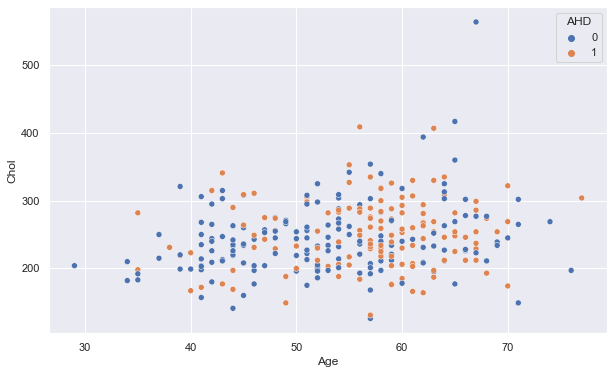

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=med_data, x="Age", y="Chol", hue="AHD")

<AxesSubplot:xlabel='Age', ylabel='RestBP'>

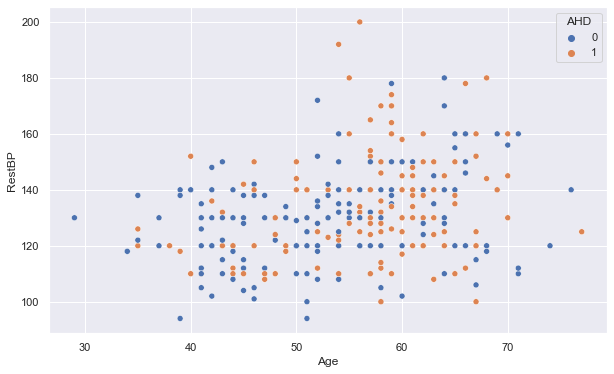

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=med_data, x="Age", y="RestBP", hue="AHD")

<AxesSubplot:xlabel='Age', ylabel='ChestPain'>

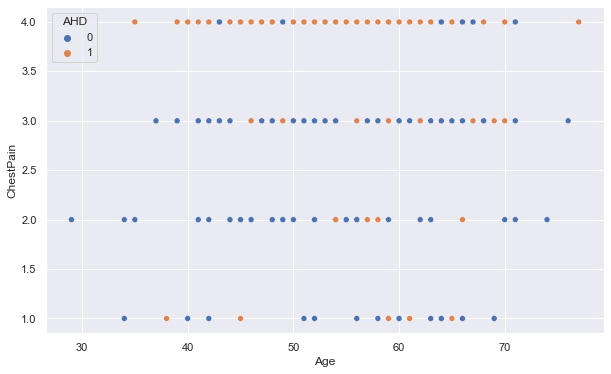

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=med_data, x="Age", y="ChestPain", hue="AHD")

### Based on the above data preparation stage plots, we can clearly observe the following:
### Regardless of age, patients in the "asymptomatic" Chest Pain category have been diagnosed with the heart disease (AHD). Here, we recall that we assigned "4" in our data preparation for the group "asymptomatic". Through this step the DS clearly understood that a crucial diagnosis to categorize the heart disease is the *Chest Pain* and ideal to build a model that can predict this crucial diagnosis using data from other diagnoses


### Additional statistics were carried out in this Step-5 and results are displayed below for  the four variables.

In [23]:
diags_AHD = med_data.groupby("AHD").mean()
diags_AHD.head()

,Patient,Age,Gender,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
AHD,,,,,,,,,,,,
0,146.487500,52.643750,0.556250,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000
1,155.562044,56.759124,0.817518,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985


In [24]:
diags_ChestPain = med_data.groupby("ChestPain").mean()
diags_ChestPain.head()

,Patient,Age,Gender,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
ChestPain,,,,,,,,,,,,
1,147.260870,55.869565,0.826087,140.869565,237.130435,0.217391,1.217391,155.956522,0.173913,1.391304,1.739130,0.478261
2,163.204082,51.224490,0.632653,128.469388,245.285714,0.102041,0.775510,162.795918,0.081633,0.314286,1.306122,0.346939
3,137.072289,53.915663,0.590361,130.132530,245.385542,0.204819,0.855422,155.518072,0.132530,0.836145,1.518072,0.469880
4,154.852113,55.838028,0.718310,132.232394,250.866197,0.112676,1.119718,140.556338,0.549296,1.385211,1.732394,0.943662


In [25]:
diags_Thal = med_data.groupby("Thal").mean()
diags_Thal.head()

,Patient,Age,Gender,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
Thal,,,,,,,,,,,,
1,152.987805,53.481707,0.512195,129.402439,247.414634,0.121951,0.975610,155.512195,0.189024,0.690854,1.439024,0.457317
2,173.722222,56.666667,0.944444,136.944444,227.000000,0.277778,1.166667,135.111111,0.444444,1.522222,2.055556,1.000000
3,143.765217,55.721739,0.869565,134.139130,250.443478,0.156522,1.000000,143.434783,0.504348,1.502609,1.765217,0.939130


### Recognizing that only three variables (Fbs, ExAng, and AHD) have binary values (0 and 1), we can do further statistics for these variables and order them according to their values, using Pandas Series. This exercise in data preparation is displayed below and we note that these three values occur in columns 6, 9, and 14:

In [26]:
# sum each column 6, 9, 14 (and each column has only value 0 or 1 -- for validation of comparison and descending order display)
diag_imp = med_data.iloc[:, [6,9,14]].sum(axis=0)

# define each column as a pandas series
diagnosis_ser = pd.Series(diag_imp.index.values, index = np.arange(len(diag_imp)))
count = pd.Series(list(diag_imp), index = np.arange(len(diag_imp)))

# create the dataframe
diag_med = pd.DataFrame(dict(diagnosis_ser = diagnosis_ser, count = count))
diag_med = diag_med[["diagnosis_ser", "count"]]
9



diag_med.sort_values(["count"], ascending=False, inplace=True)
diag_med.reset_index(inplace=True, drop=True)
print(diag_med)

  diagnosis_ser  count
0           AHD    137
1         ExAng     97
2           Fbs     43


In [27]:
diagnosed_with_heart_disease = 137
diagnosed_without_heart_disease = med_data.shape[0] - diagnosed_with_heart_disease
print(" Number of people diagnosed with heart disease =", diagnosed_with_heart_disease)
print(" Number of people diagnosed without heart disease =", diagnosed_without_heart_disease)

 Number of people diagnosed with heart disease = 137
 Number of people diagnosed without heart disease = 160


In [28]:
diagnosed_with_angina = 97
diagnosed_without_angina = med_data.shape[0] - diagnosed_with_angina
print(" Number of people diagnosed with angina (chest pain or discomfort due to coronary heart disease) =", diagnosed_with_angina)
print(" Number of people without angina =", diagnosed_without_angina)

 Number of people diagnosed with angina (chest pain or discomfort due to coronary heart disease) = 97
 Number of people without angina = 200


In [29]:
diagnosed_with_fbs = 43
diagnosed_without_fbs = med_data.shape[0] - diagnosed_with_fbs
print(" Number of people diagnosed with fbs (fasting blood sugar more than 120 mg/dl) =", diagnosed_with_fbs)
print(" Number of people without fbs =", diagnosed_without_fbs)

 Number of people diagnosed with fbs (fasting blood sugar more than 120 mg/dl) = 43
 Number of people without fbs = 254


### For the final part of the data preparation, the DS decided to identify any strongly correlated variables:

<AxesSubplot:>

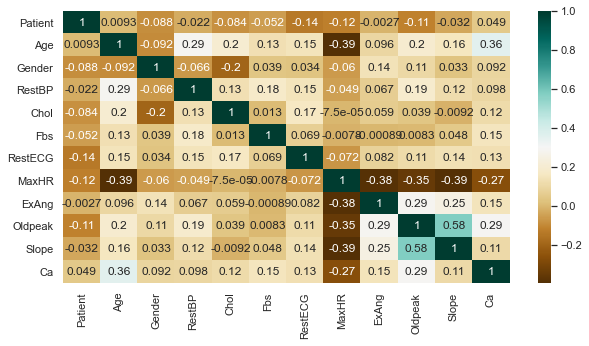

In [30]:
plt.figure(figsize=(10,5))
c= med_data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

### Based on the heatmap almost all of the variables are hardly correlated (and hence independent). As expected, compared to other variables, "Oldpeak" and "Slope" are somewhat correlated (see the green shade with 58%). These can be also seen from the definition of these two variables in the Step-4 (Data Understanding). The above statistics and description comparisons further demonstrate the validity of the DS' coding and chosen approach as part of the data preparation. Such a robust data preparation part also includes preliminary predictive modeling.  Subsequently, the DS decided to move the next step of descriptive Data Modeling.  

##  Step-7: *Data Modeling and Evaluation (with Deployment and Feedback request)*

 ### Further, based on the understanding in Step-1, for this assignment, the DS decided to build a model to further answer the client's question through the flow-chart iterative process. Since the client's problem is on relationships between various types of diagnosis, the DS decided to build a decision tree classification model to identify combinations of the diagnosis by splitting the data-based patients list to a trial set of patients (for building the model) and a test set (for evaluation of the model). Based on the above data preparation details, since there is no strong correlation between the diagnosis variables, no strongly dominant count numbers observed (from Panda Series), and that the number of variables is relatively small (only 12, including AHD), the DS decided to retain the full data-frame "med_data". (In case of a large number of variables and dependency, it would be appropriate to consider a reduced version of the data-frame by, for example, removing strongly dependent variables and those with highly dominant count values.).
 
### After building the initial model for all patients, it is important test the model through evaluation by splitting the patients list into two sets (trial and test) for the DS to understand if the preliminary test meets the initial request. Both modeling and evaluation are carried out in this assignment in Step-7 and details are given below.

### Having carried out both modeling and evaluation in this step, this assignment is concluded as follows: The DS decided to send the model to the client and ask the client to appropriately deploy the model in the hospital environment and request to provide feedback so that the DS can improve the model and repeat the evaluation/deployment/feedback iterative process, at least until the client is satisfied.


### Based on the previous step based decision to build a model to predict the crucial diagnosis Chest Pain, and the need to pass model based evaluation to the client, the DS decided to make the crucial diagnosis back to the originally provided string values:

In [114]:
med_data.loc[med_data["ChestPain"] == 1, "ChestPain"] = "typical"
med_data.loc[med_data["ChestPain"] == 2, "ChestPain"] = "nontypical"
med_data.loc[med_data["ChestPain"] == 3, "ChestPain"] = "nonanginal"
med_data.loc[med_data["ChestPain"] == 4, "ChestPain"] = "asymptomatic"

### For decision-tree model, visualization, and the need to split patients into two groups (trial and test) without bias, we first need to import libraries, and these done in the next step, followed by building and visualizing the model for the test group of patients:

In [115]:
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

!conda install python-graphviz --yes
import graphviz

from sklearn.tree import export_graphviz

import itertools


import random # library for random number generation

Solving environment: ...working... done

# All requested packages already installed.



### In the data preparation part, we identified that the "ChestPain" variable (in column 4) played a crucial role in the heart diagnois and hence we build a decision-tree model based on this variable in conjunction with remaining variables (from column 5 to 15) of the data-frame and name the reduced dataframe as "CP" and diagnosis as "diagno", decision-tree as "CP_tree". In this decision-tree the full list of patients is used:

In [116]:
CP_med_data = med_data[med_data.ChestPain.isin(["typical", "nontypical", "nonanginal", "asymptomatic"])]
CP = CP_med_data["ChestPain"]
diagno = CP_med_data.iloc[:,4:13]

#CP=CP.astype('int')
#diagno=diagno.astype('int')

CP_tree = tree.DecisionTreeClassifier(max_depth=3)
CP_tree.fit(diagno, CP)

print("Decision tree model saved to CP_tree!")

Decision tree model saved to CP_tree!


### The full (297) patient list based decision-tree is visualized below and we can observe how the node #0 (with the full list) is split into several decision based nodes (with several subsets of the list) and the decision-tree has four levels comprising 15 nodes. Starting at node #0 from "ChestPain" four group split of 297 with values [23, 49, 83, 142], the decision-tree at the final level (comprising eight of the total 15 nodes) providing finer split of the four groups, based on other diagnosis.

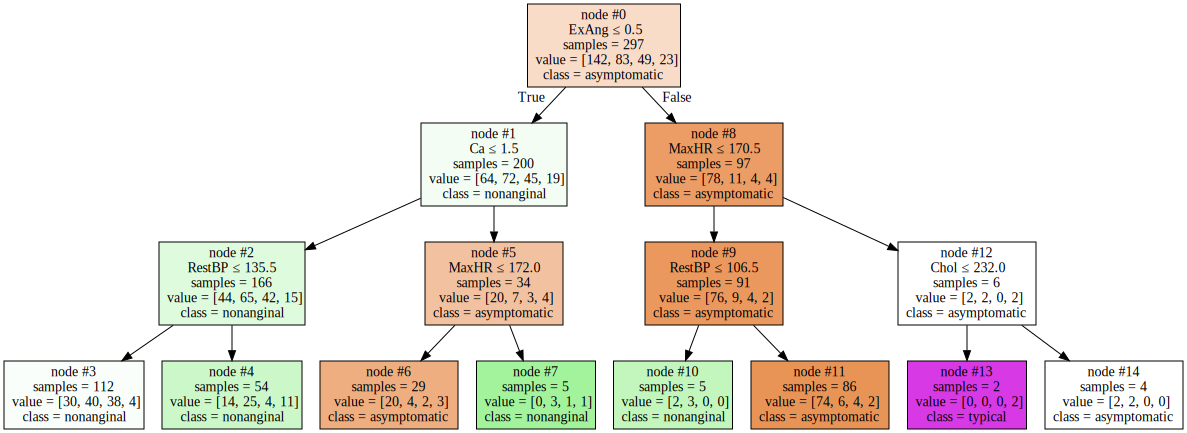

In [117]:
export_graphviz(CP_tree,
                feature_names=list(diagno.columns.values),
                out_file="CP_tree_full.dot",
                class_names=np.unique(CP),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("CP_tree_full.dot") as CP_tree_image:
    CP_tree_graph = CP_tree_image.read()
graphviz.Source(CP_tree_graph)

### Next for the evaluation of the model, the DS identified the four-group split count within the "ChestPain" (asymptomatic # 4; nonanginal # 3; nontypical # 2; typical # 1) and then proceeded into trial and test set to build a new "CP_test" decision-tree (as displayed below) based predictive model.

In [128]:
med_data["ChestPain"].value_counts()

asymptomatic    142
nonanginal       83
nontypical       49
typical          23
Name: ChestPain, dtype: int64

In [129]:
sample_number_patient = 10 # Number of test patients -- to be randomly selected among 297 using a random-seed

In [140]:
# take 10 random  patients from the list 
random.seed(1234) # set random seed
CP_test = CP_med_data.groupby("ChestPain", group_keys=False).apply(lambda x: x.sample(sample_number_patient))

CP_test_diag = CP_test.iloc[:,4:13] # ChestPain test list
CP_test_sympt = CP_test["ChestPain"] # corresponding label

In [141]:
# check that we have exactly 10 test patients in the above dataframe (split into four groups as in "ChestPain")
CP_test["ChestPain"].value_counts()

nontypical      10
nonanginal      10
asymptomatic    10
typical         10
Name: ChestPain, dtype: int64

### Next we create the model training set of patients based dataframe  by excluding the above test  patients and also ensuring correct data type ('int')

In [133]:
CP_test_index = CP_med_data.index.isin(CP_test.index)
CP_train = CP_med_data[~CP_test_index]


CP_train_diag = CP_train.iloc[:,4:13] # symptoms/diagnosis
CP_train_sympt = CP_train["ChestPain"] # corresponding  labels

In [139]:
CP_train["ChestPain"].value_counts()  #  Check the count to ensure desired number of training patients (total: 297 - 40 = 257)

asymptomatic    132
nonanginal       73
nontypical       39
typical          13
Name: ChestPain, dtype: int64

### Using the above reduced training set of patients, a finer (16-levels with 136 nodes) decision-tree "CP_train_tree" is built and visualized below 

In [135]:
CP_train_tree = tree.DecisionTreeClassifier(max_depth=15)
CP_train_tree.fit(CP_train_diag, CP_train_sympt)

print("Training Decision tree model saved to CP_train_tree!")

Training Decision tree model saved to CP_train_tree!


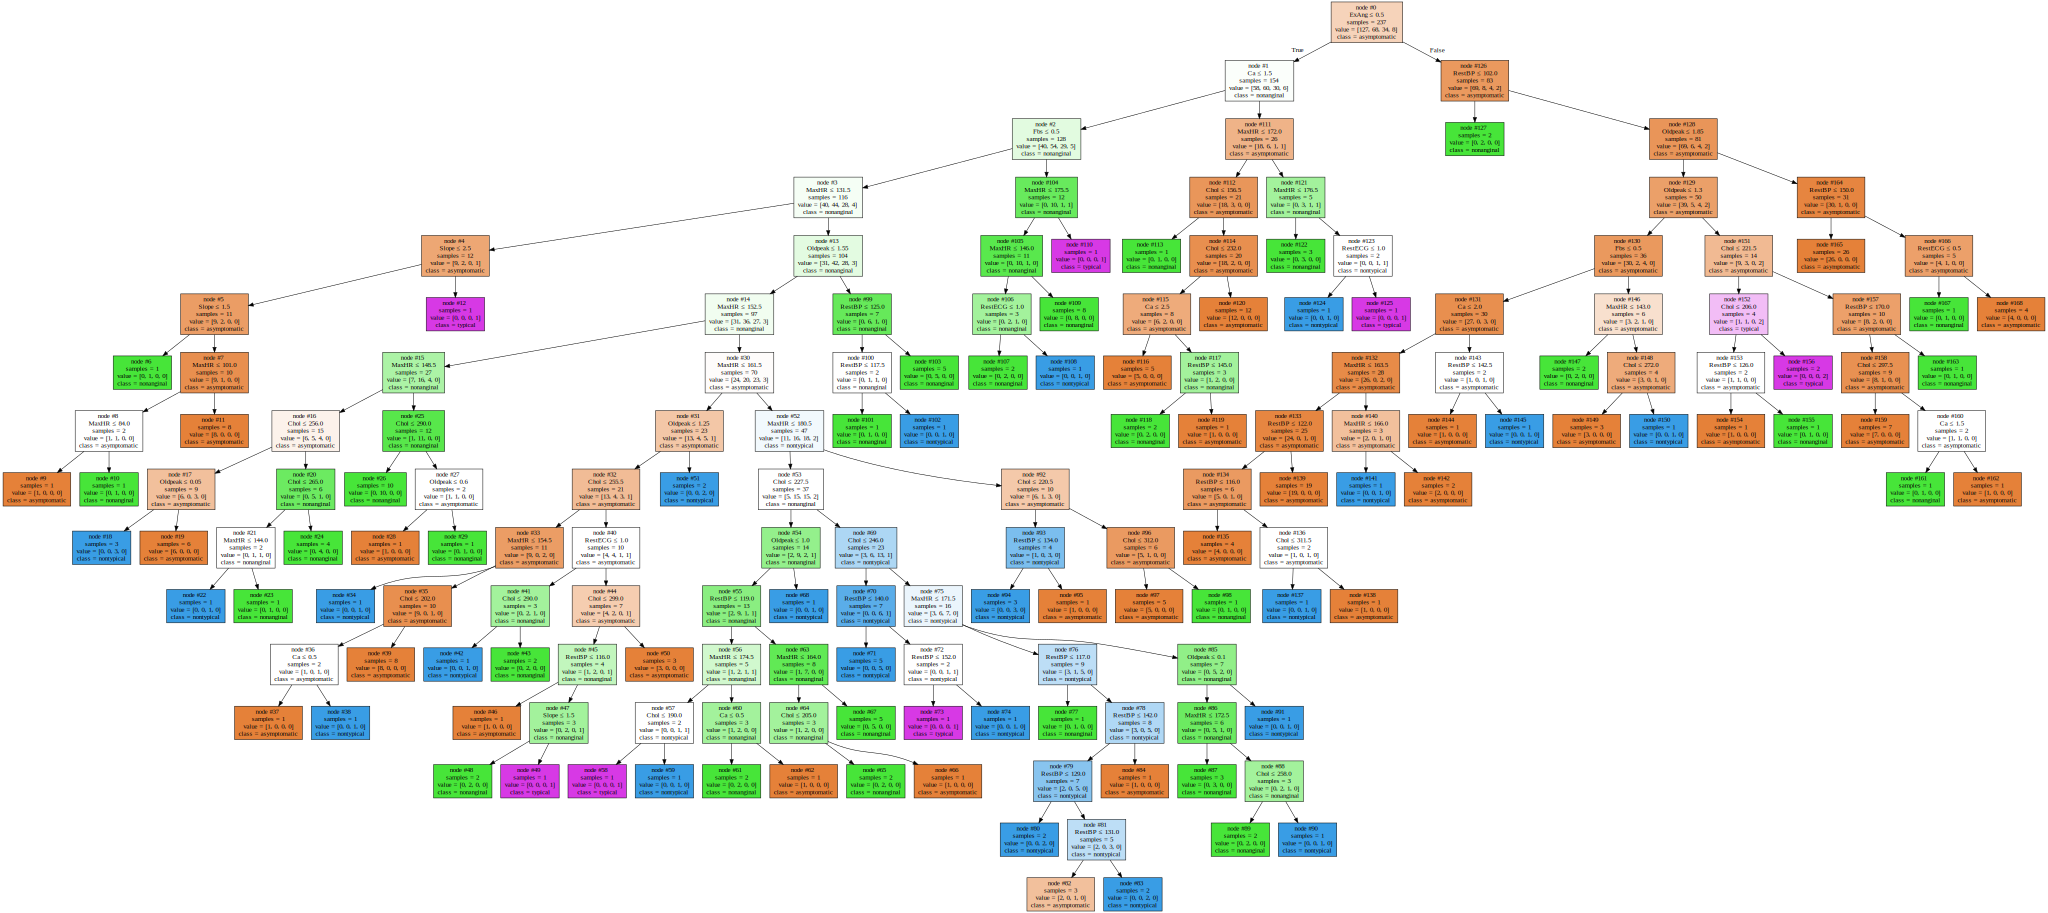

In [124]:
export_graphviz(CP_train_tree,
                feature_names=list(diagno.columns.values),
                out_file="CP_train_tree_model.dot",
                class_names=np.unique(CP),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("CP_train_tree_model.dot") as CP_train_tree_image:
    CP_train_tree_graph = CP_train_tree_image.read()
graphviz.Source(CP_train_tree_graph)

###  The above "CP_train_tree" based model faciliates predicting the decision-tree with test set:

In [137]:
CP_pred_sympt = CP_train_tree.predict(CP_test_diag)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['asymptomatic' 'nonanginal' 'nontypical' 'typical'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


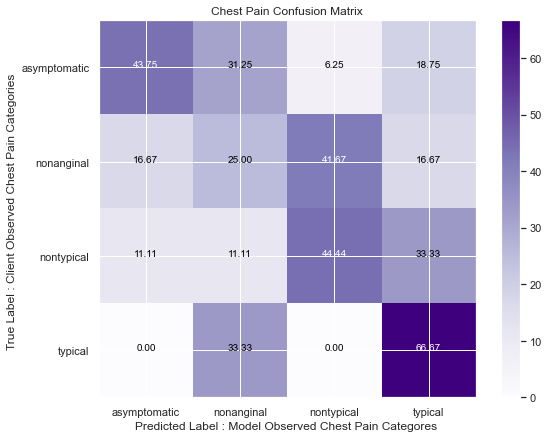

In [138]:
CP_confusion_matrix = confusion_matrix(CP_pred_sympt, CP_test_sympt,test_sympt)
title = 'Chest Pain Confusion Matrix'
#cmap = plt.cm.Blues
cmap = plt.cm.Purples

plt.figure(figsize=(8, 6))
CP_confusion_matrix = (
    CP_confusion_matrix.astype('float') / CP_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(CP_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_sympt))
plt.xticks(tick_marks, test_sympt)
plt.yticks(tick_marks, test_sympt)

fmt = '.2f'
thresh = CP_confusion_matrix.max() / 2.
for i, j in itertools.product(range(CP_confusion_matrix.shape[0]), range(CP_confusion_matrix.shape[1])):
    plt.text(j, i, format(CP_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if CP_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label : Client Observed Chest Pain Categories ')
plt.xlabel('Predicted Label : Model Observed Chest Pain Categores ')

plt.show()

### Summary from the DS to client, using the above graphical output based on evaluation of the DSM model:

-  The decision-tree model was built using a random training subset of patients and tested using a random test subset of 40 patients. 

- The decision-tree model does not use the doctors' AHD diagnosis and provides learning of the Chest Pain (CP) categorization

- The categorization by the DSM model is based on data from remaining diagnosis

- The above confusion matrix provides comparison between actually observed vs predicated CP diagnosis

- Based on the confusion matrix we observe the following evaluation of the decision-tree model.

- Using the first (bottom) row for *typical* CP diagnosis: 2/3rd (66.67%) were correctly classified; 1/3rd (33.33%) were misclassified as *nonanginal* and none were misclassified as *asymptomatic* or *nontypical*

- Using the second (from bottom) row for *nontypical* CP diagnois:  44.44% were correctly classified; 11.11% each were misclassified as *typical* or *asymptomatic*; and 1/3rd (33.33%) were misclassified as *typical* 

- Using the third (from bottom) row for *nonangial* CP diagnois:  1/4th (25%) were correctly classified; 16.67% each were misclassified as *nonanginal* or *asymptomatic*; and (33.33%) were misclassified as *typical* 

- Using the third (from bottom) row for *nonanginal* CP diagnois:  44.44% were correctly classified; 11.11% each were misclassified as *nonanginal* or *asymptomatic*; and 41.67% were misclassified as *nontypical*

- Using the fourth (top) row for *asymptomatic* CP diagnois:  43.75% were correctly classified; 31.215%  were misclassified as *nonanginal*; 6.24% were misclassified as *nontypical*; and 18.75% were misclassified as *nontypical*

- It is important note that because model decision trees are created using a random sampling of 40 patients (ten from each category), and hence remaining trial set of patients used for building the model is random, the above observed percentage values are one realization of the model. Accordingly, when the model is rerun (say, by the client) the exact same percentage will not be observed, but the subsequent realizations of the model are likely to be comparable.   



### The DS sent the summary and the above robust DSM-based framework to the  client and  requested the hypothetical client for Deployment of the model and provide Feedback so that DS can improve the model.

### The first iteration of the model with less than 300 patient- based data already resulted in an acceptable DSM based model. Subsequent iterations that will include successfully incorporating feedback and making adjustments to the modeling process (and larger data) will facilitate improved modeling and more accurate results. Each additional iteration is expected to produce much refined model.
